<a href="https://colab.research.google.com/github/saloabdala/Examen1/blob/main/lastmile_delivery_operations_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerías pandas, numpy y matplotlib respecitvamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .csv sin indice
df=pd.read_csv("lastmile_delivery_operations_mit_lift_lab.csv")
df.head(5)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,4408a234-9585-46fe-9b16-96c0faaf6db8,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),19.056893,-98.233489,14:00,KB-7050-A,Ricolino,...,no,Side,1,NaN,yes,no,NaN,no,no,NaN
1,673cd0e3-7290-4c4d-a57f-096d16b78141,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),19.056849,-98.233484,13:50,XC8687A,Marinela,...,no,Rear,1,NaN,no,no,NaN,no,no,NaN
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),19.059677,-98.233916,11:47,SM 20745,La fete,...,no,Side,0,1.0,no,no,NaN,no,no,NaN
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),19.062695,-98.228567,11:45,SP35169,Barcel,...,no,Rear,2,NaN,yes,no,NaN,no,no,NaN
4,eff15823-b1f2-4e82-afb2-2195635d1406,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),19.062724,-98.231397,11:41,SN89460,NaN,...,no,Rear,2,NaN,no,no,NaN,no,no,NaN


In [4]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

_record_id                                         0
_title                                             6
_server_updated_at                                 0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                                73
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      0
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                       0
while_parked_was_the_engine_running           

In [5]:
#Sustitución de los valores nulos
#Sustituimos los datos nulos por un enunciado, siendo estos así porque son casos muy específicos para llenarlos por otros datos
df["_title"]=df["_title"].fillna("Dato no proporcionado")
df["plates"]=df["plates"].fillna("Dato no proporcionado")
df["company_if_visible"]=df["company_if_visible"].fillna("Dato no proporcionado")
df["describe_the_accident"]=df["describe_the_accident"].fillna("Dato no proporcionado")
#Sustituimos valores nulos por 0 porque lo que indica el valor nulo es la inexistencia en estas columnas
df["serving_customer"]=df["serving_customer"].fillna(0)
df["maximum_number_of_vehicles_in_the_traffic_jam"]=df["maximum_number_of_vehicles_in_the_traffic_jam"].fillna(0)

In [6]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

_record_id                                       0
_title                                           0
_server_updated_at                               0
_updated_by                                      0
_geometry                                        0
_latitude                                        0
_longitude                                       0
arrival_of_the_freight_vehicle                   0
plates                                           0
company_if_visible                               0
visit_purpose                                    0
type_of_vehicle                                  0
number_of_operators                              0
refrigerated_truck                               0
type_of_cargo                                    0
picture_of_the_parked_freight_vehicle            0
departure_of_the_freight_vehicle                 0
where_was_the_vehicle_parked                     0
while_parked_was_the_engine_running              0
used_traffic_cone              

<Figure size 1080x576 with 0 Axes>

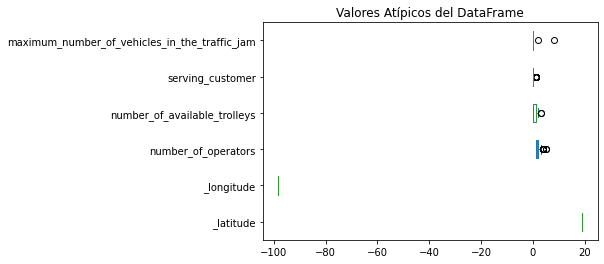

In [7]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,8))
df.plot(kind="box",vert=False)
plt.title ("Valores Atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [8]:
#Método aplicando desviación estándar.Encuentro los valores extremos
y=df
Limite_Superior=y.mean()+3*y.std()
Limite_Inferior=y.mean()-3*y.std()
print("Límite superior permitido",Limite_Superior)
print("Límite inferior permitido",Limite_Inferior)

Límite superior permitido _latitude                                        19.112587
_longitude                                      -98.109219
number_of_operators                               4.236537
number_of_available_trolleys                      2.881871
serving_customer                                  1.377910
maximum_number_of_vehicles_in_the_traffic_jam     1.886309
dtype: float64
Límite inferior permitido _latitude                                        18.967026
_longitude                                      -98.361737
number_of_operators                              -0.884889
number_of_available_trolleys                     -1.530223
serving_customer                                 -0.993294
maximum_number_of_vehicles_in_the_traffic_jam    -1.776419
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [9]:
#Encontramos Outliers del DataFrame
outliers=df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df2=df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,NaN,NaN,NaN,NaN,NaN,19.056893,-98.233489,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,19.056849,-98.233484,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,19.059677,-98.233916,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,19.062695,-98.228567,NaN,NaN,NaN,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,19.062724,-98.231397,NaN,NaN,NaN,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,19.043612,-98.194933,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
178,NaN,NaN,NaN,NaN,NaN,19.043607,-98.194856,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
179,NaN,NaN,NaN,NaN,NaN,19.043336,-98.194503,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
180,NaN,NaN,NaN,NaN,NaN,19.043576,-98.194873,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
#Eliminamos columnas innecesarias
df3=df2.drop(['_record_id', "describe_the_accident", "maximum_number_of_vehicles_in_the_traffic_jam", '_title', '_server_updated_at', '_updated_by', '_geometry', 'arrival_of_the_freight_vehicle', 'plates', 'company_if_visible', 'visit_purpose', 'type_of_vehicle', 'refrigerated_truck', 'type_of_cargo', 'picture_of_the_parked_freight_vehicle','departure_of_the_freight_vehicle', 'where_was_the_vehicle_parked', 'while_parked_was_the_engine_running', 'used_traffic_cone', 'vehicles_unloading_door', 'garage_blocking', 'accident', 'noise', 'traffic_congestion' ], axis=1)
df3

,_latitude,_longitude,number_of_operators,number_of_available_trolleys,serving_customer
0,19.056893,-98.233489,1.0,1.0,0.0
1,19.056849,-98.233484,2.0,1.0,0.0
2,19.059677,-98.233916,1.0,0.0,1.0
3,19.062695,-98.228567,1.0,2.0,0.0
4,19.062724,-98.231397,2.0,2.0,0.0
...,...,...,...,...,...
177,19.043612,-98.194933,1.0,0.0,0.0
178,19.043607,-98.194856,1.0,0.0,0.0
179,19.043336,-98.194503,1.0,1.0,0.0
180,19.043576,-98.194873,2.0,0.0,0.0


In [12]:
#Identificar valores nulos por columna
valores_nulos=df3.isnull().sum()
valores_nulos

_latitude                       0
_longitude                      0
number_of_operators             2
number_of_available_trolleys    2
serving_customer                0
dtype: int64

In [13]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=df3.copy()
data_clean=data_clean.fillna(round(df3.mean(),1))
data_clean

,_latitude,_longitude,number_of_operators,number_of_available_trolleys,serving_customer
0,19.056893,-98.233489,1.0,1.0,0.0
1,19.056849,-98.233484,2.0,1.0,0.0
2,19.059677,-98.233916,1.0,0.0,1.0
3,19.062695,-98.228567,1.0,2.0,0.0
4,19.062724,-98.231397,2.0,2.0,0.0
...,...,...,...,...,...
177,19.043612,-98.194933,1.0,0.0,0.0
178,19.043607,-98.194856,1.0,0.0,0.0
179,19.043336,-98.194503,1.0,1.0,0.0
180,19.043576,-98.194873,2.0,0.0,0.0


In [14]:
#Identificar valores nulos por columna
valores_nulos=data_clean.isnull().sum()
valores_nulos

_latitude                       0
_longitude                      0
number_of_operators             0
number_of_available_trolleys    0
serving_customer                0
dtype: int64

In [15]:
#Unimos la columnas con el data frame
columnas_quitadas=df[['_record_id', "describe_the_accident", "maximum_number_of_vehicles_in_the_traffic_jam", '_title', '_server_updated_at', '_updated_by', '_geometry', 'arrival_of_the_freight_vehicle', 'plates', 'company_if_visible', 'visit_purpose', 'type_of_vehicle', 'refrigerated_truck', 'type_of_cargo', 'picture_of_the_parked_freight_vehicle','departure_of_the_freight_vehicle', 'where_was_the_vehicle_parked', 'while_parked_was_the_engine_running', 'used_traffic_cone', 'vehicles_unloading_door', 'garage_blocking', 'accident', 'noise', 'traffic_congestion']]
Datos_limpios=pd.concat([columnas_quitadas, data_clean], axis=1)
Datos_limpios

,_record_id,describe_the_accident,maximum_number_of_vehicles_in_the_traffic_jam,_title,_server_updated_at,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,...,vehicles_unloading_door,garage_blocking,accident,noise,traffic_congestion,_latitude,_longitude,number_of_operators,number_of_available_trolleys,serving_customer
0,4408a234-9585-46fe-9b16-96c0faaf6db8,Dato no proporcionado,0.0,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),14:00,KB-7050-A,Ricolino,...,Side,yes,no,no,no,19.056893,-98.233489,1.0,1.0,0.0
1,673cd0e3-7290-4c4d-a57f-096d16b78141,Dato no proporcionado,0.0,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),13:50,XC8687A,Marinela,...,Rear,no,no,no,no,19.056849,-98.233484,2.0,1.0,0.0
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,Dato no proporcionado,0.0,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),11:47,SM 20745,La fete,...,Side,no,no,no,no,19.059677,-98.233916,1.0,0.0,1.0
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,Dato no proporcionado,0.0,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),11:45,SP35169,Barcel,...,Rear,yes,no,no,no,19.062695,-98.228567,1.0,2.0,0.0
4,eff15823-b1f2-4e82-afb2-2195635d1406,Dato no proporcionado,0.0,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),11:41,SN89460,Dato no proporcionado,...,Rear,no,no,no,no,19.062724,-98.231397,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,f964004e-67a0-4b75-b2b0-ce04b9f0b344,Dato no proporcionado,0.0,Dato no proporcionado,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),10:36,HL-3785-F,Dato no proporcionado,...,Rear,no,no,no,no,19.043612,-98.194933,1.0,0.0,0.0
178,5656a189-19f5-45a7-b53b-1a3db0de6571,Dato no proporcionado,0.0,Dato no proporcionado,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),10:33,SP-29-798,Dato no proporcionado,...,Side,no,no,no,no,19.043607,-98.194856,1.0,0.0,0.0
179,bcbd462b-4c63-490b-bfec-0ef6657ead73,Dato no proporcionado,0.0,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),11:19,05-AP-6G,Infra,...,Rear,no,no,no,no,19.043336,-98.194503,1.0,1.0,0.0
180,cd9ba76d-d899-4d87-9512-486aedb1b149,Dato no proporcionado,0.0,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),11:03,LE-88-707,Alpura,...,Rear,no,no,no,no,19.043576,-98.194873,2.0,0.0,0.0


In [16]:
#Convertit DataFrame a CSV
Datos_limpios.to_csv("Datos_limpios_lastmile_delivery_operations_mit_lift_lab.csv")

In [71]:
#Descargar archivo filtrado en csv
files.download("Datos_limpios_lastmile_delivery_operations_mit_lift_lab.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>